In [2]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [1]:
path="D:\\Mark\\python\\Python-with-ML\\Data"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
data = pd.read_csv(path+'\\AirPassengers.csv')

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(path+'\\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [7]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
ts=data["#Passengers"]

In [10]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
#1. Specific the index as a string constant:
ts['1959-01']

Month
1959-01-01    360
Name: #Passengers, dtype: int64

In [15]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [16]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [17]:
ts["1949"]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [18]:
#A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time
'''
1.constant mean
2.constant variance
3.an autocovariance that does not depend on time.
'''

'\n1.constant mean\n2.constant variance\n3.an autocovariance that does not depend on time.\n'

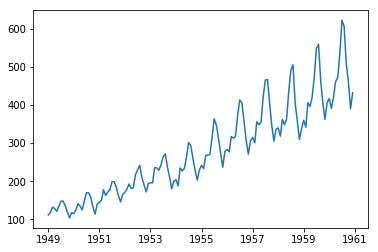

In [19]:
plt.plot(ts)

In [20]:
#methods to check stationarity
'''
1.Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
2.Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.
'''

'\n1.Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.\n2.Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.\n'

In [21]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() #pd.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(12).std() #pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

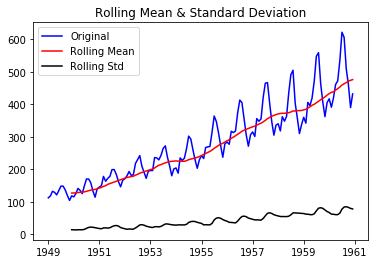

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (10%)            -2.578770
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64


In [22]:
test_stationarity(ts)

In [23]:
'''
Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.
'''

'\nThough the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.\n'

In [24]:
'''
Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.
'''

'\nLets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:\n1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.\n2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.\n'

In [25]:
#Estimating & Eliminating Trend

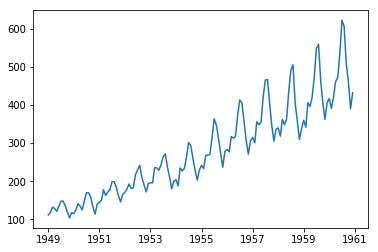

In [26]:
plt.plot(ts)

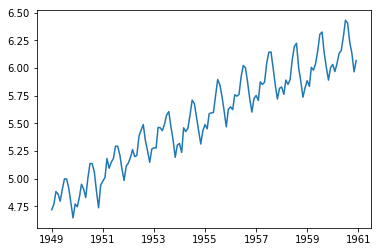

In [27]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [28]:
'''
some other techniques to model/estimate this trend and remove it
1.Aggregation – taking average for a time period like monthly/weekly averages
2.Smoothing – taking rolling averages
3.Polynomial Fitting – fit a regression model
'''

'\nsome other techniques to model/estimate this trend and remove it\n1.Aggregation – taking average for a time period like monthly/weekly averages\n2.Smoothing – taking rolling averages\n3.Polynomial Fitting – fit a regression model\n'

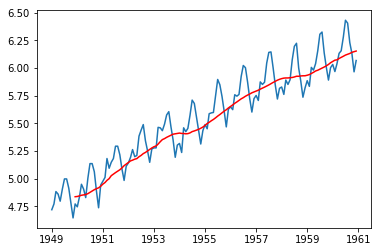

In [29]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [30]:
ts_log.head(12)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
1949-11-01    4.644391
1949-12-01    4.770685
Name: #Passengers, dtype: float64

In [31]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(24)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
Name: #Passengers, dtype: float64

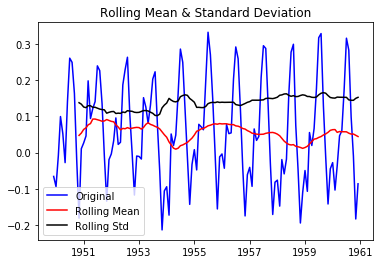

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (10%)            -2.579896
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
dtype: float64


In [32]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [33]:
'''
This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.
'''

'\nThis looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.\n'

In [34]:
#exponentially weighted moving average

In [35]:
expwighted_avg = pd.DataFrame.ewm(ts_log,span=12)[-1]
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

AttributeError: 'Series' object has no attribute 'columns'

In [36]:
#Eliminating Trend and Seasonality

In [56]:
'''
1.Differencing – taking the differece with a particular time lag
2.Decomposition – modeling both trend and seasonality and removing them from the model.
'''

'\n1.Differencing – taking the differece with a particular time lag\n2.Decomposition – modeling both trend and seasonality and removing them from the model.\n'

In [37]:
#Differencing
#In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity


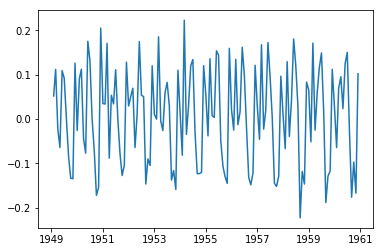

In [38]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)


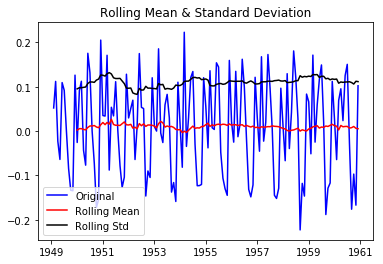

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (10%)            -2.578960
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
dtype: float64


In [39]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

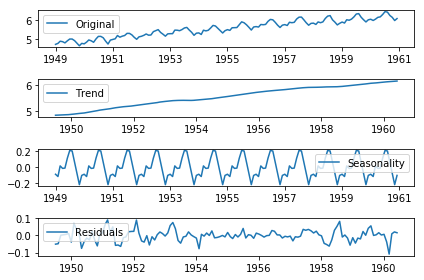

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

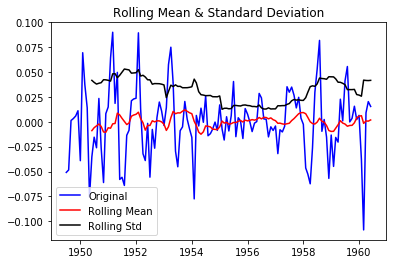

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (10%)          -2.579569e+00
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
dtype: float64


In [41]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)